In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  

In [3]:
data = pd.read_csv(r"C:\Users\bapti\Desktop\WCS Python\Projet 3\Projet-3-Skyanalytics\fichier_global\data_global_history.csv")
data.head()


,Unnamed: 0,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_vol,time_en_air,etat_voyant,temp,pressure,vibrations,vibrations_num,ref_compo,taux_usure_actuel,cout,usure_jour
0,0,D007656,CRJ700_3699,REACRJ700-CRJ700_3699-0,21.17385,2024-06-24,False,V02739709,1.9,0,-4.4,932.4,4.350903759963017 m/s²,4.350904,REACRJ700-CRJ700_3699-0,15.107925,15552,-6.065925
1,1,D000454,CRJ700_3699,REACRJ700-CRJ700_3699-1,30.57178,2024-06-24,False,V02739709,1.9,0,-4.4,932.4,4.350903759963017 m/s²,4.350904,REACRJ700-CRJ700_3699-1,24.235690,17559,-6.336090
2,2,D001694,CRJ700_3699,SYSCRJ700-CRJ700_3699-2,61.48673,2024-06-24,False,V02739709,1.9,0,-4.4,932.4,4.350903759963017 m/s²,4.350904,SYSCRJ700-CRJ700_3699-2,56.585165,16514,-4.901565
3,3,D006092,CRJ700_3699,ORDCRJ700-CRJ700_3699-3,47.07373,2024-06-24,False,V02739709,1.9,0,-4.4,932.4,4.350903759963017 m/s²,4.350904,ORDCRJ700-CRJ700_3699-3,42.218665,16047,-4.855065
4,4,D005717,CRJ700_3699,AUTCRJ700-CRJ700_3699-4,57.81891,2024-06-24,False,V02739709,1.9,0,-4.4,932.4,4.350903759963017 m/s²,4.350904,AUTCRJ700-CRJ700_3699-4,50.915055,19362,-6.903855


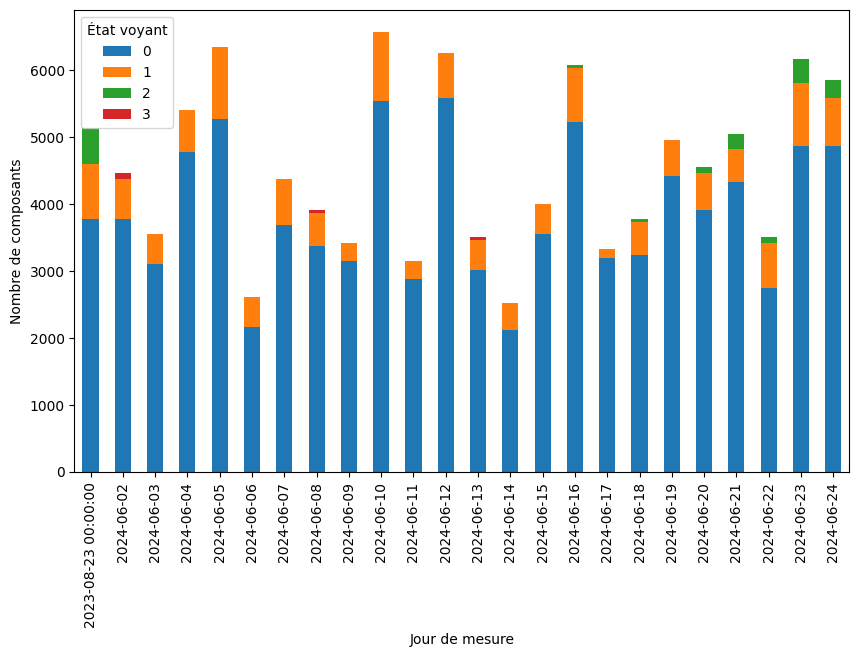

In [4]:
composant_count = data.groupby(['measure_day', 'etat_voyant']).size().reset_index(name='counts')
composant_count = composant_count.sort_values('measure_day')
composant_pivot = pd.pivot_table(composant_count, values='counts', index='measure_day', columns='etat_voyant')

composant_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.legend(title="État voyant", loc="upper left")


plt.xlabel("Jour de mesure")
plt.ylabel("Nombre de composants")


plt.show()


Text(0, 0.5, "Taux d'usure actuel")

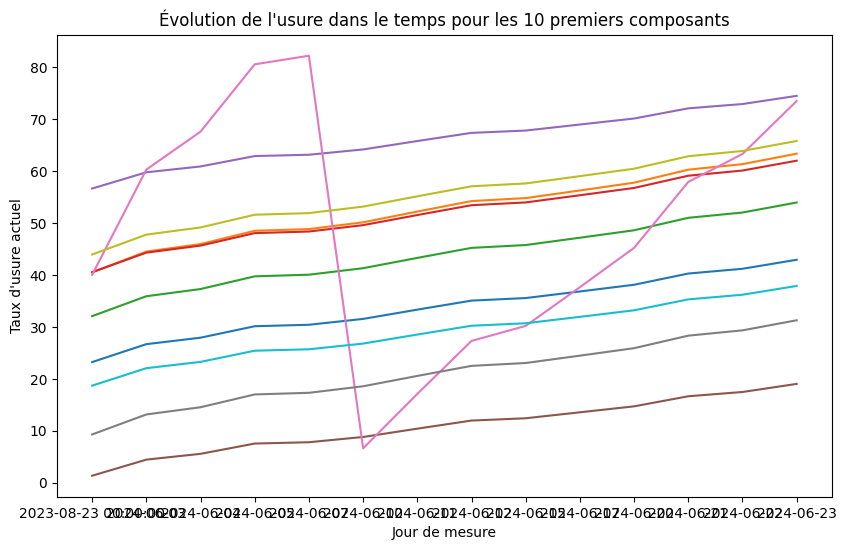

In [5]:
data = data.sort_values(by="measure_day")
top_10_composants = data['ref_compo'].unique()[:10]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for ref_compo in top_10_composants:
    # Filtrez les données pour le composant actuel
    composant_data = data[data['ref_compo'] == ref_compo]

    # Créez un graphique en ligne pour le composant actuel
    ax.plot(composant_data['measure_day'], composant_data['usure_nouvelle'], label=ref_compo)


# Ajoutez un titre au graphique
plt.title("Évolution de l'usure dans le temps pour les 10 premiers composants")

# Ajoutez des étiquettes aux axes
plt.xlabel("Jour de mesure")
plt.ylabel("Taux d'usure actuel")


In [6]:
data_change_voyant = data[data["etat_voyant"]!=0]
data_change_voyant

,Unnamed: 0,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_vol,time_en_air,etat_voyant,temp,pressure,vibrations,vibrations_num,ref_compo,taux_usure_actuel,cout,usure_jour
82416,2586,D000726,E170_5551,SYSE170-E170_5551-10,23.240000,2023-08-23 00:00:00,False,V02655736,0.6,1,-13.7,903.6,4.332326433679554 m/s²,4.332326,SYSE170-E170_5551-10,14.850000,18091,-8.390000
6678,828,D007165,E170_5551,SIEE170-E170_5551-31,49.480000,2023-08-23 00:00:00,False,V08858117,3.7,2,7.8,949.0,2.211709559388169 m/s²,2.211710,SIEE170-E170_5551-31,9.440000,2151,-40.040000
6679,829,D004752,E170_5551,SIEE170-E170_5551-32,55.960000,2023-08-23 00:00:00,False,V08858117,3.7,2,7.8,949.0,2.211709559388169 m/s²,2.211710,SIEE170-E170_5551-32,57.465200,3722,1.505200
6680,830,D004752,E170_5551,SIEE170-E170_5551-32,55.960000,2023-08-23 00:00:00,False,V08858117,3.7,2,7.8,949.0,2.211709559388169 m/s²,2.211710,SIEE170-E170_5551-32,37.320000,3722,-18.640000
6681,831,D003176,E170_5551,SYSE170-E170_5551-33,39.130000,2023-08-23 00:00:00,False,V08858117,3.7,2,7.8,949.0,2.211709559388169 m/s²,2.211710,SYSE170-E170_5551-33,40.612410,2723,1.482410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3993,D002395,A340_3614,SYSA340-A340_3614-33,40.739795,2024-06-24,False,V06945698,2.7,1,-12.9,988.8,0.45236256279705733 m/s²,0.452363,SYSA340-A340_3614-33,33.915115,2723,-6.824680
3994,3994,D001247,A340_3614,SYSA340-A340_3614-34,35.980172,2024-06-24,False,V06945698,2.7,1,-12.9,988.8,0.45236256279705733 m/s²,0.452363,SYSA340-A340_3614-34,29.208684,2021,-6.771488
3995,3995,D007913,A340_3614,TOIA340-A340_3614-35,57.796810,2024-06-24,False,V06945698,2.7,1,-12.9,988.8,0.45236256279705733 m/s²,0.452363,TOIA340-A340_3614-35,51.340570,4801,-6.456240
3996,3996,D000354,A340_3614,SYSA340-A340_3614-36,58.157621,2024-06-24,False,V06945698,2.7,1,-12.9,988.8,0.45236256279705733 m/s²,0.452363,SYSA340-A340_3614-36,53.110237,13453,-5.047384


In [7]:
# AJOUT CODE BRUNO  

In [12]:
data_aero = data[["linked_aero","time_en_air","etat_voyant","vibrations","vibrations_num","temp","pressure"]].groupby("linked_aero")
data_aero.sample(5)

,linked_aero,time_en_air,etat_voyant,vibrations,vibrations_num,temp,pressure
70044,A320_1884,0.6,0,3.5251619164739694 m/s²,3.525162,17.4,872.1
7662,A320_1884,7.8,0,0.16085126119662174 m/s²,0.160851,6.3,972.6
51146,A320_1884,3.6,0,0.9731549606350365 m/s²,0.973155,18.3,986.5
77208,A320_1884,2.5,0,1.2906130364785522 m/s²,1.290613,-8.4,962.5
1731,A320_1884,3.9,0,4.640886670021213 m/s²,4.640887,-9.3,970.0
...,...,...,...,...,...,...,...
43261,E175_6879,0.7,0,4.840907746622953 m/s²,4.840908,-2.4,991.9
87415,E175_6879,5.2,0,1.283184307121119 m/s²,1.283184,-1.3,1029.6
55664,E175_6879,9.8,0,4.31883875939099 m/s²,4.318839,3.1,920.0
87402,E175_6879,5.2,0,1.283184307121119 m/s²,1.283184,-1.3,1029.6
